In [1]:
# Import dependencies
import psycopg2
from config import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create link to database
def connect():
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # read connection parameters
        params = config()

        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params)
		
        # create a cursor
        cur = conn.cursor()
        
	# execute a statement
        print('PostgreSQL database version:')
        cur.execute('SELECT version()')

        # display the PostgreSQL database server version
        db_version = cur.fetchone()
        print(db_version)
       
	# close the communication with the PostgreSQL
        cur.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')


if __name__ == '__main__':
    connect()
    
    #https://www.postgresqltutorial.com/postgresql-python/connect/

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 13.3 (Ubuntu 13.3-1.pgdg20.04+1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0, 64-bit',)
Database connection closed.


In [3]:
# Get data from database
def get_Data():
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
         # read connection parameters
        params = config()

        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params)
		
        # create a cursor
        cur = conn.cursor()
        
	# execute a statement
        print('PostgreSQL database query:')
        sql = 'SELECT * FROM "cpi_CUUR0000SA0"'
        query = pd.read_sql_query(sql, conn)
        df1 = pd.DataFrame(query)
        
        sql = 'SELECT * FROM "ppi_WPUFD4"'
        query = pd.read_sql_query(sql, conn)
        df2 = pd.DataFrame(query)
        
        return df1, df2
    # close the communication with the PostgreSQL
        cur.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')


if __name__ == '__main__':
    get_Data()

Connecting to the PostgreSQL database...
PostgreSQL database query:
Database connection closed.


In [4]:
# Assign dataframes
cpi_df, ppi_df = get_Data()

Connecting to the PostgreSQL database...
PostgreSQL database query:
Database connection closed.


CPI Data and Plot

In [5]:
# Investigate CPI data
cpi_df.head()

,idx,year,period,value
0,0,2020,M12,260.474
1,1,2020,M11,260.229
2,2,2020,M10,260.388
3,3,2020,M09,260.280
4,4,2020,M08,259.918


In [6]:
# Modify DF
cpi_asc = cpi_df.sort_values(by=['idx'], ascending=False)
cpi_asc.reset_index(drop=True, inplace=True)
cpi_asc.drop(columns='idx', inplace=True)

month_mapper = {"M01":"Jan",
               "M02":"Feb",
               "M03":"Mar",
               "M04":"Apr",
               "M05":"May",
               "M06":"Jun",
               "M07":"Jul",
               "M08":"Aug",
               "M09":"Sep",
               "M10":"Oct",
               "M11":"Nov",
               "M12":"Dec",}

for index, row in cpi_asc.iterrows():
    cpi_asc.loc[index,'period_concat'] = str(row.year) + '_' + month_mapper[row.period]

In [7]:
# Investigate modified DF
cpi_asc.head()

,year,period,value,period_concat
0,2011,M01,220.223,2011_Jan
1,2011,M02,221.309,2011_Feb
2,2011,M03,223.467,2011_Mar
3,2011,M04,224.906,2011_Apr
4,2011,M05,225.964,2011_May


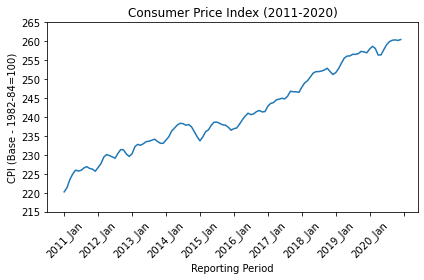

<Figure size 432x288 with 0 Axes>

In [8]:
# Create Plot
import matplotlib.ticker as plticker

x = cpi_asc['period_concat']
y = cpi_asc['value']

fig, ax = plt.subplots()
ax.plot(x,y)
loc = plticker.MultipleLocator(base=12.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=45)
plt.ylabel("CPI (Base - 1982-84=100)")
plt.ylim([215,265])
plt.yticks(np.arange(215,266,5))
plt.xlabel("Reporting Period")
plt.title("Consumer Price Index (2011-2020)")
plt.figure(figsize=(6, 4))
fig.tight_layout()
ax.patch.set_facecolor('white')
fig.savefig('static/images/data/CPI_2011-2020.png')
plt.show()

PPI Data and Plot

In [9]:
# Investigate PPI Data
ppi_df.head()

,idx,year,period,value
0,0,2020,M12,119.4
1,1,2020,M11,119.3
2,2,2020,M10,119.5
3,3,2020,M09,118.7
4,4,2020,M08,118.5


In [10]:
# Modify DF
ppi_asc = ppi_df.sort_values(by=['idx'], ascending=False)
ppi_asc.reset_index(drop=True, inplace=True)
ppi_asc.drop(columns='idx', inplace=True)

month_mapper = {"M01":"Jan",
               "M02":"Feb",
               "M03":"Mar",
               "M04":"Apr",
               "M05":"May",
               "M06":"Jun",
               "M07":"Jul",
               "M08":"Aug",
               "M09":"Sep",
               "M10":"Oct",
               "M11":"Nov",
               "M12":"Dec",}

for index, row in ppi_asc.iterrows():
    ppi_asc.loc[index,'period_concat'] = str(row.year) + '_' + month_mapper[row.period]

In [11]:
# Investigate modified DF
ppi_asc.head()

,year,period,value,period_concat
0,2011,M01,103.4,2011_Jan
1,2011,M02,104.2,2011_Feb
2,2011,M03,105.2,2011_Mar
3,2011,M04,105.9,2011_Apr
4,2011,M05,106.1,2011_May


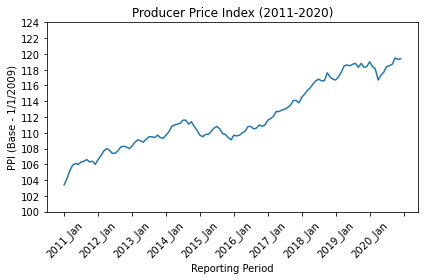

<Figure size 432x288 with 0 Axes>

In [12]:
# Create Plot
x = ppi_asc['period_concat']
y = ppi_asc['value']

fig, ax = plt.subplots()
ax.plot(x,y)
loc = plticker.MultipleLocator(base=12.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=45)
plt.ylabel("PPI (Base - 1/1/2009)")
plt.ylim([100,124])
plt.yticks(np.arange(100,125,2))
plt.xlabel("Reporting Period")
plt.title("Producer Price Index (2011-2020)")
plt.figure(figsize=(6, 4))
fig.tight_layout()
ax.patch.set_facecolor('white')
fig.savefig('static/images/data/PPI_2011-2020.png')
plt.show()